# 경사 하강법
특정 상황에 가장 적합한 모델을 찾아야 하는경우 \
가장 적합한(best): 모델의 오류(error)를 최소화하는 or 가능도(likelihood)를 최대화하는 것을 의미 \
즉, 어떤 최적화 문제에 관한 답을 내리는 것 \
최적화 문제는 문제를 풀기 위해 '경사 하강법(Gradient Descent)'라 부르는 방법을 사용함

## 8.1 경사 하강법에 숨은 의미
Gradient(경사, 기울기)(미적분에서 편미분 벡터)는 함수가 가장 빠르게 증가할 수 있는 방향을 나타낸다. \
함수의 최댓값을 구하는 방법 중 하나는 임의의 시작점을 잡은 후, 그 gradient를 계산하고, gradient 방향으로 조금 이동하는 과정을 여러 번 반복하는 것이다.

## 8.2 Gradient 계산하기
f가 단변수 함수인 경우, 점 x에서의 미분값은 x가 아주 조금 변했을 때 f(x)의 변화량을 의미한다. 아래 코드에서 x의 변화량을 h로 표기하였고, 아주 조금 변한다는 것을 반영하기 위해 h를 0에 점근하게 했다. \
이때 미분값은 함수 변화율(difference quotient)의 극한값이다.

In [11]:
from typing import List

Vector = List[float]

In [6]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                       x: float,
                       h: float) -> float:
    return ((f(x+h) - f(x)) / h)

미분값은 점(x, f(x))에서 함수와 접하는 선의 기울기를 의미한다. 위에서 나타낸 두 값의 차이 (f(x+h) - f(x) / h)는 점 (x+h, f(x+h))를 통과하지만 함수와 완벽하게는 접하지 않는 선의 기울기를 나타낸다. h의 값이 작아질수록, 완벽히 접하지 않았던 선이 점점 함수와 접하게 된다.

In [7]:
def square(x: float) -> float:
    return x * x

square함수의 도함수(deriviate)는

In [8]:
def derivative(x: float) -> float:
    return 2 * x

도함수를 구할 수 없다면 (혹은 도함수를 구하고 싶지 않다면) 어떻게 해야할까? \
Python으로는 극한값을 구할 수 없지만, 아주 작은 e값을 대입해 미분박을 어림 잡을 수 있다.

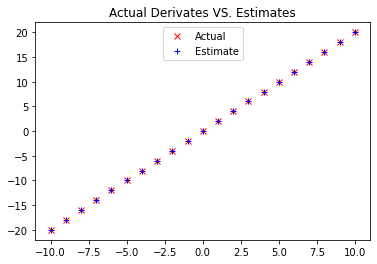

In [9]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# 두 계산식의 결과값이 거의 비슷함을 보여 주기 위한 그래프
import matplotlib.pyplot as plt
plt.title("Actual Derivates VS. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label="Estimate")
plt.legend(loc=9)
plt.show()

만약 f가 **다변수 함수**라면 여러 개의 입력 변수 중 하나에 작은 변화가 있을 때, f(x)의 변화량을 알려주는 **편도함수(partial derivative)**역시 여러 개 존재한다. \
i번째 편도함수는 i번째 변수를 제외한 다른 모든 입력 변수를 고정시켜서 계산할 수 있다.

In [12]:
def partial_difference_quotient(f: Callable[[Vector], float],
                               v: Vector,
                               i: int,
                               h: float) -> float:
    """함수 f의 i번째 편도함수가 v에서 가지는 값"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

일반적인 도함수와 같은 방법으로 gradient descent의 근사값을 구할 수 있다.

In [13]:
def estimate_gradient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

## 8.3 Gradient 적용하기
함수 sum_of_squares는 v가 0벡터일 때 가장 작은 값을 가진다. 만약 이 사실을 모른다고 가정하고, 경사 하강법을 이용해서 3차원 벡터의 최솟값을 구해보자 \
**임의의 시작점**을 잡고, gradient가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동하면 된다.

In [33]:
def add(v: Vector, w: Vector) -> Vector:
    """각 성분끼리 더한다."""
    assert len(v) == len(w), "vector must be the same length"
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def dot(v: Vector, w: Vector) -> float:
    """v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w),  "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v: Vector) -> float:
    """v_1 * v_1 + ... v_n * v_n"""
    return dot(v,v)

# 제곱 값의 합을 이용하면 벡터의 크기를 계산할 수 있다.
import math

def magnitude(v: Vector) -> float:
    """벡터 v의 크기를 반환"""
    return math.sqrt(sum_of_squares(v))  # math.sqrt는 제곱근을 계산해 주는 함수

assert magnitude([3,4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    """(v_1 - w_1)**2 + ... + (v_n - w_n)**2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """벡터 v와 w 간의 거리를 계산"""
    return math.sqrt(squared_distance(v,w))

def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v,w))

def scalar_multiply(c: float, v: Vector) -> Vector:
    """모든 성분을 c로 곱하기"""
    return [c * v_i for v_i in v]

def vector_sum(vectors: List[Vector]) -> Vector:
    """모든 벡터의 각 성분들끼리 더한다."""
    # vectors가 비어있는지 확인
    assert vectors, "no vectors provided"
    
    # 모든 벡터의 길이가 동일한지 확인
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    # i번째 결과값은 모든 벡터의 i번째 성분을 더한 값
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

In [14]:
import random

In [19]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """v에서 step_size만큼 이동하기"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [20]:
# 임의의 시작점을 선택
v = [random.uniform(-10, 10) for i in range(3)]

In [21]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # v의 gradient 게산
    v = gradient_step(v, grad, -0.01)  # gradient의 음수만큼 이동
    print(epoch, v)

assert distance(v, [0, 0, 0] < 0.001)  # v는 0에 수렴해야 한다.

0 [-5.846848332143225, -2.351164863351958, 0.5159193718838666]
1 [-5.729911365500361, -2.304141566084919, 0.5056009844461893]
2 [-5.615313138190354, -2.2580587347632206, 0.4954889647572655]
3 [-5.503006875426546, -2.2128975600679563, 0.4855791854621202]
4 [-5.392946737918016, -2.1686396088665973, 0.4758676017528778]
5 [-5.285087803159655, -2.1252668166892654, 0.46635024971782024]
6 [-5.179386047096462, -2.08276148035548, 0.45702324472346384]
7 [-5.0757983261545325, -2.04110625074837, 0.44788277982899455]
8 [-4.974282359631442, -2.000284125733403, 0.43892512423241464]
9 [-4.874796712438813, -1.960278443218735, 0.43014662174776636]
10 [-4.777300778190036, -1.9210728743543604, 0.42154368931281105]
11 [-4.681754762626236, -1.8826514168672732, 0.4131128155265548]
12 [-4.588119667373711, -1.8449983885299277, 0.40485055921602375]
13 [-4.496357274026237, -1.8080984207593291, 0.39675354803170326]
14 [-4.406430128545712, -1.7719364523441425, 0.3888184770710692]
15 [-4.318301525974798, -1.7364977

898 [-7.725699294489932e-08, -3.106698120792431e-08, 6.81707084048103e-09]
899 [-7.571185308600133e-08, -3.0445641583765824e-08, 6.6807294236714096e-09]
900 [-7.41976160242813e-08, -2.983672875209051e-08, 6.547114835197981e-09]
901 [-7.271366370379567e-08, -2.92399941770487e-08, 6.416172538494022e-09]
902 [-7.125939042971976e-08, -2.8655194293507726e-08, 6.2878490877241414e-09]
903 [-6.983420262112536e-08, -2.8082090407637572e-08, 6.162092105969659e-09]
904 [-6.843751856870285e-08, -2.752044859948482e-08, 6.038850263850266e-09]
905 [-6.706876819732879e-08, -2.6970039627495125e-08, 5.91807325857326e-09]
906 [-6.572739283338221e-08, -2.6430638834945222e-08, 5.799711793401795e-09]
907 [-6.441284497671456e-08, -2.5902026058246318e-08, 5.683717557533759e-09]
908 [-6.312458807718027e-08, -2.538398553708139e-08, 5.570043206383084e-09]
909 [-6.186209631563667e-08, -2.4876305826339762e-08, 5.458642342255423e-09]
910 [-6.062485438932394e-08, -2.4378779709812966e-08, 5.349469495410314e-09]
911 [-

TypeError: '<' not supported between instances of 'list' and 'float'

## 8.4 적절한 이동 거리 정하기
경사를 따라 이동한다는 논리는 명백하지만 이동 거리(step size), 즉 얼마만큼 이동해야 하는지 정하는 것은 그렇지 않다. 실제로 이동 거리를 정하는 것은 과학보다는 기숧(art)에 가깝다. 일반적인 옵션은 다음과 같다.
- 이동 거리를 고정
- 시간에 따라 이동 거리를 점차 줄임
- 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함

세 번째가 가장 좋아 보일 수 있는데, 계산 비용이 너무 크다. 이동 거리가 너무 짧다면 경사 하강법을 수행하는 데 너무 오래 걸릴 것이다. 반대로 이동 거리가 너무 길다면 최적화하려는 함수가 너무 커지거나 더 이상 유효하지 않을 수 있다. 적절한 이동 거리를 찾기 위해서는 여러 값으로 실험을 해봐야 한다.

## 8.5 경사 하강법으로 모델 학습
손실 함수(Loss Function)을 통해 모델이 얼마나 주어진 데이터에 적합한지를 계산함 (손실 함수는 작을수록 더 좋다) \
주어진 데이터가 더 이상 변하지 않는다고 가정하면, 손실 함수는 모델의 파라미터가 얼마나 좋고 나쁜지 알려준다. 즉, 경사 하강법으로 손실을 최소화하는 모델의 파라미터를 구할 수 있다는 것이다. 

In [22]:
# xsms -50 ~ 49사이의 값이며, y는 항상 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50,50)]

x와 y가 선형 관계라는 것을 알고 있지만, 데이터를 통해서 이 관계를 학습시켜보자. 경사 하강법으로 평균제곱오차를 최소화해주는 경사와 절편을 구해보자.

In [23]:
# 한 개의 데이터 포인트에서 오차의 gradient를 계산해주는 함수를 만듬
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept  # 모델의 예측값
    error = (predicted - y)  # 오차는 (예측값 - 실제값)
    squared_error = error ** 2  # 오차의 제곱을 최소화하자.
    grad = [2 * error * x, 2 * error]  # gradient를 사용한다.
    return grad

지금까지는 하나의 데이터 포인트에서 제곱오차를 계산했다. 이제는 전체 데이터 셋에서 **평균제곱오차(mean squared error)**를 계산해 보자. 평균제곱오차의 gradient는 각 데이터 포인트에서 계산된 그래디언트 평균이다. 다음과 같이 경사 하강법을 적용해 보자 \
1. 임의의 theta로 시작
2. 모든 그래디언트의 평균의 계산
3. theta를 2번에서 계산된 값으로 변경
4. 반복 \
전체 데이터셋을 한 번 훑어본다는 의미에 에폭(epoch)을 여러 번 수행하면 올바른 경사와 절편이 학습되었을 것이다.

In [27]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """각 성분별 평균을 계산"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [34]:
# 임의의 경사와 절편으로 시작
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rete = 0.001

for epoch in range(5000):
    # 모든 gradient 평균을 계산
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # gradient만큼 이동
    theta = gradient_step(theta, grad, -learning_rete)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.34867310472423, 0.6079592453729407]
1 [11.092042998394316, 0.630091999986919]
2 [25.937237412070974, 0.6299238589853395]
3 [16.035492570007648, 0.6446012486794398]
4 [22.639971057053575, 0.6493475387520885]
5 [18.234788652484017, 0.660688814731638]
6 [21.17305665760789, 0.6676022257546587]
7 [19.213238811601293, 0.6774400779607572]
8 [20.520447152739898, 0.685298436616437]
9 [19.648547047559106, 0.694448286895944]
10 [20.230113567564974, 0.7027079373697112]
11 [19.84221695837153, 0.7115326350625367]
12 [20.10095282140125, 0.7199517867507832]
13 [19.928384419912117, 0.7286128359986829]
14 [20.043496204754618, 0.7370839947465977]
15 [19.966725115423415, 0.7456533229618592]
16 [20.017940001335543, 0.7541287414313589]
17 [19.983788147850625, 0.7626384239498317]
18 [20.006575943807583, 0.7710969352497826]
19 [19.991384942415593, 0.7795613173230906]
20 [20.00152580472612, 0.78799357963086]
21 [19.994770281827307, 0.7964191182763244]
22 [19.99928464113946, 0.8048210503215991]
23 [19.996

843 [19.99951278016798, 4.188778687059748]
844 [19.999513754315018, 4.1904006424657965]
845 [19.99951472651435, 4.19201935493518]
846 [19.999515696769866, 4.193634830951824]
847 [19.99951666508545, 4.19524707698669]
848 [19.99951763146499, 4.196856099497802]
849 [19.99951859591235, 4.198461904930272]
850 [19.999519558431395, 4.200064499716324]
851 [19.999520519025975, 4.201663890275323]
852 [19.99952147769995, 4.203260083013798]
853 [19.99952243445715, 4.20485308432547]
854 [19.99952338930141, 4.206442900591276]
855 [19.99952434223655, 4.208029538179395]
856 [19.999525293266398, 4.209613003445273]
857 [19.999526242394758, 4.211193302731648]
858 [19.99952718962543, 4.21277044236858]
859 [19.99952813496221, 4.214344428673468]
860 [19.99952907840888, 4.215915267951083]
861 [19.999530019969228, 4.2174829664935904]
862 [19.999530959647018, 4.219047530580572]
863 [19.99953189744602, 4.220608966479058]
864 [19.999532833369983, 4.2221672804435455]
865 [19.999533767422665, 4.223722478716028]
86

1593 [19.99989140072066, 4.819182134678835]
1594 [19.999891617853997, 4.819543661810198]
1595 [19.999891834553193, 4.819904466104432]
1596 [19.999892050819124, 4.820264549006776]
1597 [19.99989226665265, 4.820623911959582]
1598 [19.99989248205464, 4.820982556402315]
1599 [19.999892697025956, 4.821340483771565]
1600 [19.999892911567457, 4.821697695501048]
1601 [19.999893125680007, 4.822054193021613]
1602 [19.999893339364455, 4.82240997776125]
1603 [19.99989355262167, 4.822765051145092]
1604 [19.99989376545249, 4.823119414595424]
1605 [19.999893977857784, 4.823473069531685]
1606 [19.99989418983839, 4.82382601737048]
1607 [19.999894401395164, 4.824178259525577]
1608 [19.99989461252895, 4.824529797407921]
1609 [19.9998948232406, 4.824880632425634]
1610 [19.999895033530947, 4.825230765984023]
1611 [19.999895243400843, 4.825580199485586]
1612 [19.999895452851124, 4.825928934330015]
1613 [19.99989566188263, 4.826276971914206]
1614 [19.9998958704962, 4.82662431363226]
1615 [19.999896078692668,

2342 [19.999975745176076, 4.959615703600751]
2343 [19.999975793671158, 4.959696447938726]
2344 [19.999975842069276, 4.95977703083652]
2345 [19.999975890370628, 4.959857452616916]
2346 [19.999975938575407, 4.959937713602053]
2347 [19.999975986683808, 4.960017814113424]
2348 [19.999976034696015, 4.960097754471882]
2349 [19.99997608261223, 4.960177534997634]
2350 [19.999976130432643, 4.96025715601025]
2351 [19.99997617815744, 4.960336617828663]
2352 [19.999976225786817, 4.960415920771163]
2353 [19.999976273320964, 4.960495065155407]
2354 [19.999976320760073, 4.960574051298417]
2355 [19.99997636810433, 4.960652879516581]
2356 [19.999976415353927, 4.960731550125652]
2357 [19.999976462509057, 4.960810063440754]
2358 [19.9999765095699, 4.960888419776382]
2359 [19.99997655653665, 4.960966619446399]
2360 [19.9999766034095, 4.961044662764043]
2361 [19.99997665018863, 4.9611225500419245]
2362 [19.999976696874228, 4.9612002815920295]
2363 [19.999976743466483, 4.96127785772572]
2364 [19.99997678996

3092 [19.999994593700368, 4.99099850786594]
3093 [19.99999460450972, 4.991016505443908]
3094 [19.99999461529746, 4.99103446703753]
3095 [19.999994626063632, 4.9910523927187525]
3096 [19.999994636808275, 4.991070282559378]
3097 [19.99999464753144, 4.991088136631068]
3098 [19.99999465823316, 4.991105955005337]
3099 [19.999994668913487, 4.9911237377535596]
3100 [19.999994679572456, 4.991141484946966]
3101 [19.99999469021012, 4.991159196656644]
3102 [19.999994700826505, 4.991176872953541]
3103 [19.999994711421675, 4.99119451390846]
3104 [19.99999472199565, 4.991212119592065]
3105 [19.999994732548494, 4.991229690074877]
3106 [19.99999474308023, 4.9912472254272755]
3107 [19.999994753590915, 4.9912647257195015]
3108 [19.99999476408058, 4.991282191021654]
3109 [19.999994774549275, 4.991299621403691]
3110 [19.99999478499704, 4.991317016935433]
3111 [19.99999479542391, 4.9913343776865595]
3112 [19.99999480582994, 4.99135170372661]
3113 [19.999994816215157, 4.991368995124986]
3114 [19.99999482657

3842 [19.999998794958238, 4.9979936047458065]
3843 [19.999998797367603, 4.997997616331273]
3844 [19.99999879977214, 4.998001619895978]
3845 [19.999998802171877, 4.998005615455957]
3846 [19.999998804566815, 4.998009603027217]
3847 [19.999998806956963, 4.998013582625729]
3848 [19.99999880934233, 4.9980175542674345]
3849 [19.999998811722932, 4.998021517968242]
3850 [19.999998814098774, 4.998025473744028]
3851 [19.999998816469862, 4.998029421610639]
3852 [19.99999881883621, 4.998033361583888]
3853 [19.99999882119783, 4.998037293679556]
3854 [19.999998823554726, 4.998041217913395]
3855 [19.99999882590691, 4.9980451343011225]
3856 [19.99999882825439, 4.998049042858427]
3857 [19.99999883059718, 4.998052943600965]
3858 [19.999998832935283, 4.99805683654436]
3859 [19.99999883526871, 4.998060721704206]
3860 [19.999998837597474, 4.998064599096066]
3861 [19.99999883992158, 4.998068468735472]
3862 [19.99999884224104, 4.998072330637922]
3863 [19.999998844555865, 4.9980761848188875]
3864 [19.99999884

4592 [19.999999731401193, 4.999552782821321]
4593 [19.999999731938225, 4.999553676987079]
4594 [19.99999973247419, 4.999554569365044]
4595 [19.99999973300908, 4.999555459958788]
4596 [19.999999733542904, 4.99955634877188]
4597 [19.999999734075654, 4.999557235807879]
4598 [19.999999734607346, 4.999558121070339]
4599 [19.99999973513797, 4.999559004562806]
4600 [19.999999735667537, 4.999559886288818]
4601 [19.99999973619604, 4.999560766251908]
4602 [19.999999736723492, 4.9995616444556]
4603 [19.999999737249887, 4.999562520903412]
4604 [19.99999973777523, 4.999563395598855]
4605 [19.999999738299522, 4.9995642685454325]
4606 [19.999999738822765, 4.999565139746641]
4607 [19.99999973934496, 4.999566009205971]
4608 [19.999999739866116, 4.999566876926904]
4609 [19.999999740386226, 4.999567742912917]
4610 [19.9999997409053, 4.999568607167477]
4611 [19.999999741423334, 4.999569469694047]
4612 [19.99999974194033, 4.999570330496082]
4613 [19.999999742456296, 4.99957118957703]
4614 [19.9999997429712

## 8.6 미니배치와 SGD(Stochastic Gradient Descent)
앞서 살펴본 경사 하강법의 단점은 데이터셋 전체의 gradient를 모두 구해야 이동 거리만큼 파라미터를 업데이트할 수 있다는 점이다. 100개 데이터 포인트의 gradient descent는 계산은 오래걸리지 않는다. \
하지만 큰 데이터셋으로 모델을 학습할 경우, gradient 계산은 굉ㅈ아히 오래 걸릴 것이다. 이럴 때는 더 자주 gradient 만큼 이동하는 방법을 사용하면 된다. \
**미니배치 경사 하강법(minibatch gradient descent)**에서는 전체 데이터셋의 샘플인 미니배치에서 gradient를 계산한다.

In [38]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # 변수의 타입과 무관한 함수를 생성

def minibatches(dataset: List[T],
               batch_size: int,
               shuffle: bool = True) -> Iterator[List[T]]:
    """dataset에서 batch_size만큼 데이터 포인트를 샘플링해서 미니배치를 생성"""
    # 각 미니배치의 시작점인 0, batch_size, 2 * batch_size, ...을 나열
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)  # 미니배치의 순서를 섞는다.
    
    for start in batch_starts:
        end =start + batch_size
        yield dataset[start:end]

TypeVar(T)로 '포괄적인(generic)' 함수를 만들 수 있다. 이를 통해 dataset이 str이나 int or list로 구성되어 있어도 타입에 무관하게 미니배치를 생성할 수 있게 해준다.

In [40]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rete)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.8175980094136, -0.8700741468650843]
1 [20.32303855352625, -0.788242420145972]
2 [20.022103708782755, -0.5169010782989716]
3 [20.02930924507481, -0.4842193225794961]
4 [22.29636525681974, -0.3386266734232374]
5 [20.263389162175233, -0.47002737478855083]
6 [19.80585137163125, -0.23264062332962415]
7 [20.011630053830626, -0.1992970062546973]
8 [20.057572251944787, -0.16832783634580092]
9 [20.008936195534414, -0.1369374906201457]
10 [20.003570681887453, 0.08765967106777194]
11 [19.72169454171212, 0.10105927883529243]
12 [19.74943301002547, 0.1312110251325868]
13 [18.81183889942216, 0.1807928247724835]
14 [20.7038668178025, 0.07626929470582436]
15 [20.200476748534353, 0.5318064440595333]
16 [20.17248600768286, 0.5384666826846304]
17 [17.980282409180948, 0.6554922830082683]
18 [19.212446403678296, 1.0342572991035521]
19 [19.99075624288593, 1.1031017026210377]
20 [19.84865099567992, 1.1478187667020994]
21 [20.125813223222345, 1.1871868874877798]
22 [19.86016193664115, 1.3526638936728992

810 [20.00001194755901, 4.9999352402413955]
811 [20.000005428605334, 4.999935248696468]
812 [19.999990583580484, 4.99993546660015]
813 [20.000011374445545, 4.999936520169107]
814 [19.999998865878318, 4.999938292338066]
815 [20.000004268676644, 4.999938838219775]
816 [20.00000056440576, 4.999939171316128]
817 [19.999972352555574, 4.999940823814364]
818 [19.999994378371284, 4.999940644629142]
819 [20.000011453224783, 4.999941486809768]
820 [20.0000025105088, 4.999941200704631]
821 [19.999998237015625, 4.999942116976948]
822 [19.999997150686916, 4.999942408183983]
823 [20.000003328783304, 4.99994293755941]
824 [19.999999598317828, 4.999943298184148]
825 [19.999986375400535, 4.9999439684423255]
826 [19.999995626301057, 4.999943954470021]
827 [20.000001801267366, 4.999945389822488]
828 [19.99999808485335, 4.999946499833925]
829 [20.000001868570603, 4.999947456474029]
830 [19.999998100112126, 4.999949749177995]
831 [19.999997895258407, 4.999951943903458]
832 [19.99997929047184, 4.99995329895

SGD(stochastic gradient descent)의 경우에는 각 에폭마다 단 하나의 데이터 포인트에서 그래디언트를 계산한다.

In [42]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rete)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.113732953404618, -0.6607320032452219]
1 [20.108852760696635, -0.4178652868000492]
2 [20.104182559772944, -0.1854184787531308]
3 [20.099712733598903, 0.037055486355814314]
4 [20.095434681650147, 0.24998448114130045]
5 [20.091340173183013, 0.4537780207848389]
6 [20.087421344475956, 0.6488280508560744]
7 [20.08367062959255, 0.8355097006407772]
8 [20.080080859822655, 1.0141820052708361]
9 [20.0766450847355, 1.1851885959073947]
10 [20.07335673184258, 1.3488583603975555]
11 [20.0702094327169, 1.5055060758837615]
12 [20.067197189594083, 1.655433014675533]
13 [20.064314180411447, 1.7989275238087108]
14 [20.06155484569352, 1.9362655782946638]
15 [20.058913920925818, 2.0677113133765466]
16 [20.05638629383939, 2.1935175320488343]
17 [20.053967112856558, 2.3139261906291435]
18 [20.05165172086481, 2.4291688647252747]
19 [20.049435657939593, 2.5394671942448865]
20 [20.047314679010693, 2.6450333101454695]
21 [20.04528471307906, 2.746070242629683]
22 [20.043341824182107, 2.8427723106465983]
23 [

위의 예시에서 SGD가 훨씬 적은 에폭 안에서 최적의 파라미터를 찾아낸다. 하지만 미니배치 경사 하강법과 SGD는 각각의 장단점이 있댜. \
미니배치 경사 하강법은 더 오래 걸리지만, SGD의 경우 특정 데이터 포인트의 gradient와 데이터셋 전체의 gradient의 방향이 서로 상반될 수도 있다는 단점이 있다. \
만약 gradient를 계산해 주는 함수를 직접 만들어서 사용하지 않을 것이라면 배치를 벡터화해서 gradient를 계산하는 것이 epoch별로 각 데이터 포인트의 gradeint를 하는 것보다 빠를 것이다.